In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

In [2]:
cifar = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
# check class distribution in y_train
import pandas as pd
pd.DataFrame(y_train)[0].value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: 0, dtype: int64

In [6]:
# normalize input x
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# MLP model - gives 0.4533 accuracy
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax'),
# ])

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [10]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [11]:
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 42s 8ms/step - loss: 1.5624 - accuracy: 0.4300 - val_loss: 1.2879 - val_accuracy: 0.5380
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1928 - accuracy: 0.5766 - val_loss: 1.0999 - val_accuracy: 0.6154
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0523 - accuracy: 0.6297 - val_loss: 1.0793 - val_accuracy: 0.6234
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9614 - accuracy: 0.6650 - val_loss: 0.9938 - val_accuracy: 0.6552
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8924 - accuracy: 0.6895 - val_loss: 0.9290 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8328 - accuracy: 0.7096 - val_loss: 0.9105 - val_accuracy: 0.6841
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7808 - accuracy: 0.7267 - val_loss: 0.9004 - val_ac

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

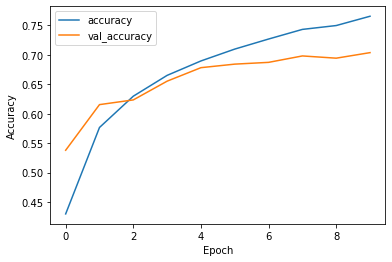

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [19]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.8775 - accuracy: 0.7036


[0.8774828910827637, 0.7035999894142151]